In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

In [2]:
# Dataset con attributi originali
df = pd.read_csv("dataset_All_normalized.csv")
class_name = 'Occupancy'

In [3]:
df.head()

,Temperature,Light,CO2,HumidityRatio,Day,Afternoon,Evening,Night,Weekday,Weekend,Occupancy
0,0.869029,0.603964,0.208231,0.549737,0,1,0,0,1,0,1
1,0.872357,0.596946,0.215163,0.551972,0,1,0,0,1,0,1
2,0.874576,0.591029,0.220898,0.549997,0,1,0,0,1,0,1
3,0.873190,0.509582,0.224045,0.544374,0,1,0,0,1,0,1
4,0.879014,0.504267,0.226675,0.550376,0,1,0,0,1,0,1


## CLASSIFICAZIONI

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score 
from scikitplot.metrics import plot_precision_recall, plot_roc, plot_cumulative_gain, plot_lift_curve
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.model_selection import KFold
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, classification_report

## Dobbiamo valutare l'accuratezza di ogni classificatore con 
### Accuracy, Precision, Recall, F1, ROC, AUC and Lift Chart.

In [5]:
########### NOTE
######
###### CAPIRE TUTTI I POSSIBILI PARAMETRI DELLE METRICHE PRESENTI IN "result_pred"
######
######

In [6]:
# Funzione che viene chiamata sul:
# - y_true: target reale
# - y_pred: target predetto dal classificatore
# stampa: matrice di confusione, accuracy, precision, recall, specificity, F1
def result_pred(y_true, y_pred):
    print("**** Matrice di Confusione *****")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(' True negative: %d False negative: %d' % (tn, fn))
    print(' True positive: %d False positive: %d' % (tp, fp))
    print("____________________________________________")

    # Calcolo dell'accuracy
    print("***** Calcolo dell'accuracy *****")
    accuracy = accuracy_score(y_true, y_pred)    
    print('Frazione di campioni correttamente correlati: %0.4f' % accuracy)
    accuracy = accuracy_score(y_true, y_pred, False)
    print("Numero di campioni correttamente correlati: ", accuracy)    
    print("____________________________________________")

    # Calcolo della precision
    print("**** Calcolo della precisione *****")
    #Percentuale di classificazioni positive che sono corrette
    #se dico "positivo" dico giusto?
    precision = precision_score(y_true, y_pred)
    print('Percentuale di classificazioni positive che sono corrette: %0.4f' % precision)   
    print("____________________________________________")    

    # Calcolo della recall
    print("**** Calcolo della recall (sensitivity) *****")
    recall = recall_score(y_true, y_pred)
    print('Percentuale di elementi positivi del testing set che sono stati classificati come positivi: %0.4f' % recall)
    print("____________________________________________")    

    # Calcolo della specificity
    print("**** Calcolo della specificity *****")
    specificity = tn / (tn+fp)
    print('Percentuale di elementi negativi del testing set che sono stati classificati come negativi: %0.4f' % specificity)
    print("____________________________________________")   
    
    # Calcolo dell'F1 score
    print("**** Calcolo della F1 score *****")
    f1 = f1_score(y_true, y_pred)
    #Il punteggio F1 può essere interpretato come una media ponderata della precisione e della recall, 
    #in cui un punteggio F1 raggiunge il suo valore migliore a 1 e il punteggio peggiore a 0.
    print('F1 scores: %0.4f' % f1)
    print("____________________________________________")   
    
    # Stampiamo le stesse statistiche dalla funzione report
    print(classification_report(y_test, y_pred))
    
    print("Con le tecniche viste finora non viene fornita nessuna informazione sulla “gravità” degli errori (“errore lieve” oppure “errore grave)")
    print("per questo si usano la curva CMC, la curva ROC")

In [7]:
########### NOTE
######
###### CAPIRE TUTTI I POSSIBILI PARAMETRI DELLE METRICHE PRESENTI IN "plot_res"
###### Quelli della curva di ROC
######
##### Nota: si potrebbe scrivere una funzione per ogni plot in modo da confrontare plot diversi

In [8]:
# La funzione stampa il ROC curve

# Prima di chiamare questa funzione dobbiamo aver
# scritto in y_pred il valore di ".predict" che come output fornirà 0 o 1
# dentro a y_score il valore di ".predict_proba" che darà solo la probabilità di 1
def plot_res(y_pred, y_score, y_test):
    #ROC CURVE: implementazione legata esclusivamente all'attività di classificazione binaria
    #false positive rate, true positive rate
    print("****** ROC CURVE + AUC?: passo passo *******")
    fprate, tprate, threashold = roc_curve(y_test, y_score[:, 1])
    auc_score = auc(fprate, tprate)
    plt.plot(fprate, tprate, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (auc_score))
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve', fontsize=16)
    plt.legend(loc="lower right", fontsize=14, frameon=False)
    plt.tick_params(axis='both', which='major', labelsize=16)
    plt.show()

    print("____________________________________")
    print("****** VALORE DI AUC *******")    
    print(roc_auc_score(y_test, y_score[:,1]))    
    
    print("____________________________________")
    print("****** ROC CURVE: con metodo diretto *******")
    plot_roc(y_test, y_score)
    plt.show()
    
    print("____________________________________")
    print("****** Precision recall: con metodo diretto *******")
    plot_precision_recall(y_test, y_score)
    plt.show()
    

    print("____________________________________")
    print("****** Cumulative gain: con metodo diretto *******")
    plot_cumulative_gain(y_test, y_score)
    plt.show()
    
    
    print("____________________________________")
    print("****** Lift curve: con metodo diretto *******")    
    plot_lift_curve(y_test, y_score)
    plt.show()

# Prova

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LogisticRegression

#Funzione per plottare 
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

def plot_decision_knn(X, y):
    
    fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    estimator = KNeighborsClassifier(n_neighbors=5)
    title = "Learning Curves KNN "
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                        cv=cv, n_jobs=10)

    # SVC is more expensive so we do a lower number of CV iterations:
    cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    estimator = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1000, min_samples_leaf=5, min_samples_split=50)
    title = "Learning Curves DecisionTree"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                        cv=cv, n_jobs=10)

    plt.show()

def plot_gauss(X, y):
    
    fig, axes = plt.subplots(3, 2, figsize=(10, 15))

    # Cross validation with 100 iterations to get smoother mean test and train
    # score curves, each time with 20% data randomly selected as a validation set.
    cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    estimator = GaussianNB()
    title = "Learning Curves Gauss"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 0], ylim=(0.7, 1.01),
                        cv=cv, n_jobs=10)

    # SVC is more expensive so we do a lower number of CV iterations:
    cv = ShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
    X = df[['Light', 'CO2', 'HumidityRatio', 'Day']].values
    y = df[class_name]
    estimator = GaussianNB()
    title = "Learning Curves Gauss"
    plot_learning_curve(estimator, title, X, y, axes=axes[:, 1], ylim=(0.7, 1.01),
                        cv=cv, n_jobs=10)
    plt.show()

# Plot Grafici non bilanciati (senza la Regressione Logistica)

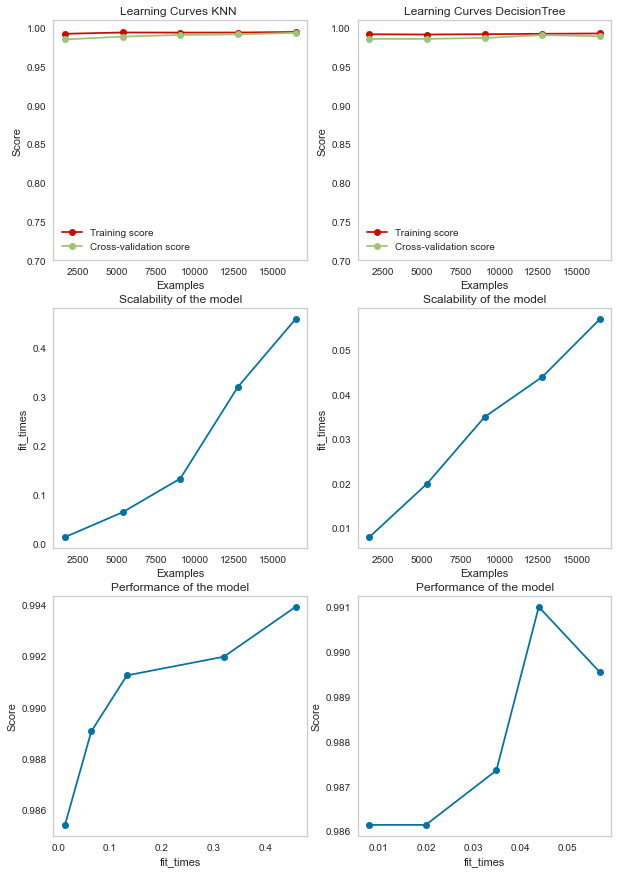

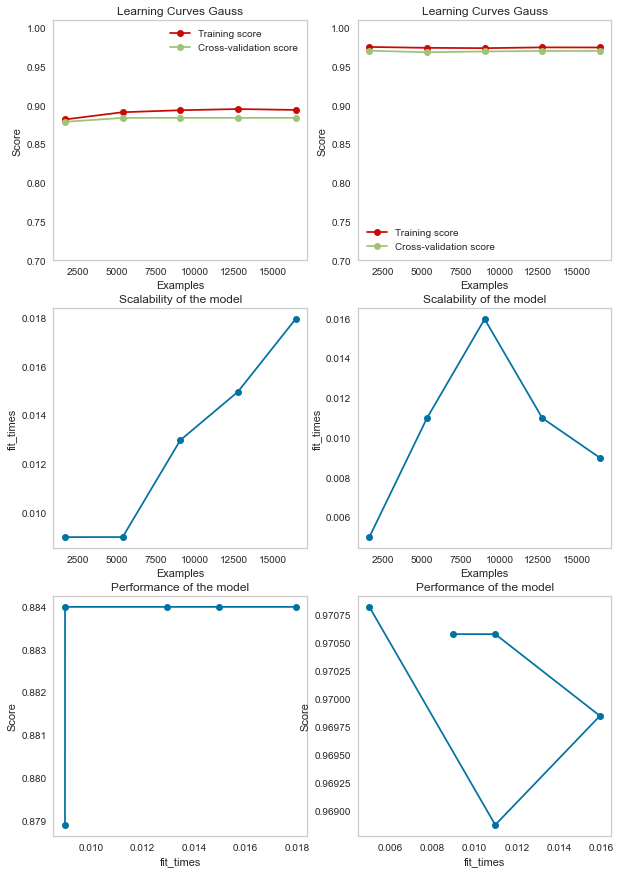

In [71]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
plot_decision_knn(X, y)
plot_gauss(X, y)

In [11]:
from sklearn.model_selection import cross_val_score, learning_curve, validation_curve

# K-NN

In [12]:
# Guardare il sito:
#https://www.ritchieng.com/machine-learning-cross-validation/
#
# La parte relativa a:
#
#cross_val_score executes the first 4 steps of k-fold cross-validation steps which I have broken down to 7 steps here in detail
#Split the dataset (X and y) into K=10 equal partitions (or "folds")
#Train the KNN model on union of folds 2 to 10 (training set)
#Test the model on fold 1 (testing set) and calculate testing accuracy
#Train the KNN model on union of fold 1 and fold 3 to 10 (training set)
#Test the model on fold 2 (testing set) and calculate testing accuracy
#It will do this on 8 more times
#When finished, it will return the 10 testing accuracy scores as a numpy array


In [74]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

## Funzione utilizzata successivamente nella cross validation per automatizzare un po'
def testKNN(k):
    #Istanziamo il classificatore
    knn = KNeighborsClassifier(n_neighbors=k)
    #Facciamo cross validation
    results = cross_val_score(knn, X, y, cv=5)
    return results


In [75]:
for k in range(40, 80):
    print(testKNN(k))

[0.97106031 0.97786965 0.97495136 0.98832685 0.99416342]
[0.97106031 0.97957198 0.97495136 0.98857004 0.99416342]
[0.97106031 0.97957198 0.97495136 0.98832685 0.99416342]
[0.97106031 0.98030156 0.97495136 0.98832685 0.99416342]
[0.97106031 0.98005837 0.97519455 0.98711089 0.99416342]
[0.97106031 0.98030156 0.97519455 0.98711089 0.99416342]
[0.97106031 0.98005837 0.97519455 0.98711089 0.99416342]
[0.97106031 0.98078794 0.97519455 0.98735409 0.99416342]
[0.97106031 0.98054475 0.97519455 0.98735409 0.99416342]
[0.97106031 0.98151751 0.97519455 0.98735409 0.99416342]
[0.97106031 0.98151751 0.97519455 0.98735409 0.99392023]
[0.97106031 0.9817607  0.97519455 0.98735409 0.99416342]
[0.97106031 0.9817607  0.97519455 0.98735409 0.99392023]
[0.97106031 0.9817607  0.97519455 0.98784047 0.99392023]
[0.97106031 0.9817607  0.97519455 0.98784047 0.99392023]
[0.97106031 0.9817607  0.97495136 0.98832685 0.99392023]
[0.97106031 0.9817607  0.97495136 0.98784047 0.99392023]
[0.97106031 0.98224708 0.974951

# Stessa cosa precedente ma usando la GridSearch

In [11]:
## Per il plotting dei dati guardare il seguente sito
## https://stackoverflow.com/questions/37161563/how-to-graph-grid-scores-from-gridsearchcv

In [14]:
#Grid search vera e propria
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
#parameters = {'n_neighbors': np.arange(1, 39), 'weights':['uniform', 'distance'], 'p':[1,2,3]}
parameters = {'n_neighbors': np.arange(80, 100)}
#scores = {"PRECISION":"precision", "ACCURACY": "accuracy", "F1":"f1", "RECALL":"recall"}
k_fold = StratifiedKFold(n_splits=4, random_state=42)

estimator_list = []
grid_list = []
result_list = []
best_params = []


knn = KNeighborsClassifier()
#for score in scores.values():
error = []
search = GridSearchCV(knn, parameters, error_score='raise', cv=k_fold)
#search = GridSearchCV(knn, parameters, scoring=score, error_score='raise', cv=k_fold)
search.fit(X_train, y_train)
grid_list.append(search)
#print(search.cv_results_)
clf = search.best_estimator_
estimator_list.append(clf)
result_list.append(search.cv_results_)
best_params.append(search.best_params_)
print(clf)
print("_____________________________________________")
print("Best parameters set found on development set:")
print()
print(search.best_params_)
print()
print("Grid scores on development set:")
print()
means = search.cv_results_['mean_test_score']
stds = search.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, search.predict(X_test)
print("STAMPIAMO LA MEDIA ERRORE: ")
print(np.mean(y_pred != y_true))
    #plt.figure(figsize=(12, 6))
    #range(1, 40),
    #plt.plot(np.arange(0, len(y_true)), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')#, markersize=10)
    #plt.title('Error Rate K Value')
    #plt.xlabel('K Value')
    #plt.ylabel('Mean Error')
    #plt.grid()
    #plt.show()
print("_____________________________________________")
print(classification_report(y_true, y_pred))
print()
print("_____________________________________________")
print("_____________________________________________")
print(confusion_matrix(y_true, y_pred))
print()
print("_____________________________________________")
                 
    

c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\model_selection\_split.py:292: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=80, p=2,
                     weights='uniform')
_____________________________________________
Best parameters set found on development set:

{'n_neighbors': 80}

Grid scores on development set:

0.987 (+/-0.001) for {'n_neighbors': 80}
0.987 (+/-0.001) for {'n_neighbors': 81}
0.987 (+/-0.001) for {'n_neighbors': 82}
0.987 (+/-0.001) for {'n_neighbors': 83}
0.987 (+/-0.001) for {'n_neighbors': 84}
0.987 (+/-0.001) for {'n_neighbors': 85}
0.987 (+/-0.001) for {'n_neighbors': 86}
0.987 (+/-0.001) for {'n_neighbors': 87}
0.987 (+/-0.001) for {'n_neighbors': 88}
0.987 (+/-0.001) for {'n_neighbors': 89}
0.987 (+/-0.001) for {'n_neighbors': 90}
0.987 (+/-0.001) for {'n_neighbors': 91}
0.987 (+/-0.001) for {'n_neighbors': 92}
0.987 (+/-0.001) for {'n_neighbors': 93}
0.987 (+/-0.001) for {'n_neighbors': 94}
0.987 (+/-0.001) for {'n_neighbors': 95}
0.987 (+/

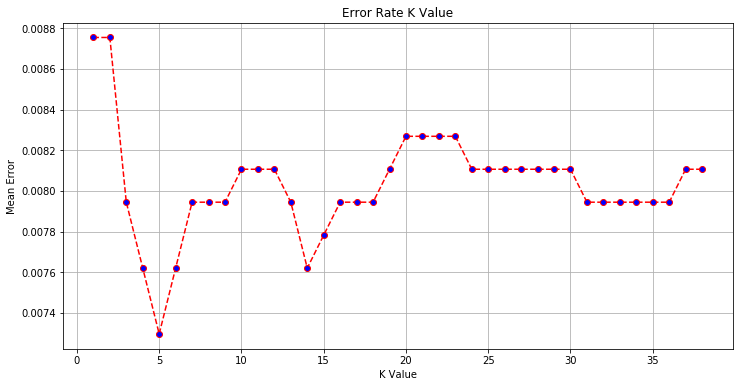

In [13]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 39):
    knn = KNeighborsClassifier(n_neighbors=i, weights='distance', p=2)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1,39), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue')#, markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.grid()

# Una volta scelti i parametri bisogna rieseguire il knn

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

## Stampiamo le metriche

In [15]:
result_pred(y_test, y_pred)

**** Matrice di Confusione *****
 True negative: 4719 False negative: 9
 True positive: 1416 False positive: 24
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9946
Numero di campioni correttamente correlati:  6135
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9833
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.9937
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9949
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9885
____________________________________________
              precision    recall  f1-score   

## Plottiamo i grafici

****** ROC CURVE + AUC?: passo passo *******


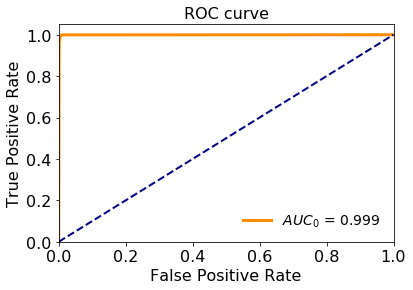

____________________________________
****** VALORE DI AUC *******
0.9988979511819819
____________________________________
****** ROC CURVE: con metodo diretto *******


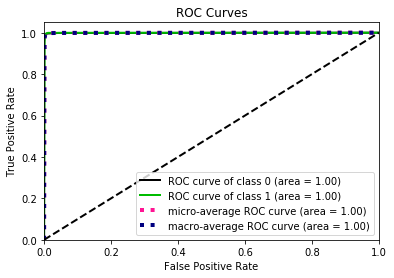

____________________________________
****** Precision recall: con metodo diretto *******


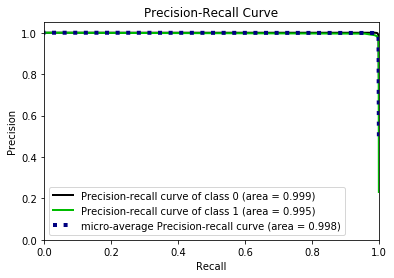

____________________________________
****** Cumulative gain: con metodo diretto *******


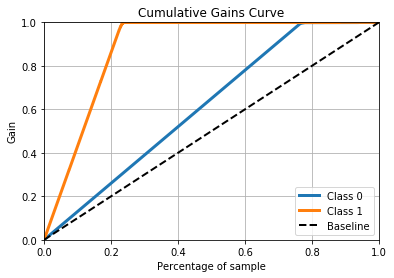

____________________________________
****** Lift curve: con metodo diretto *******


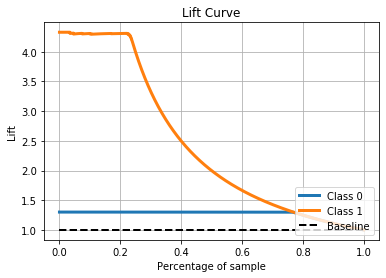

In [16]:
y_score = knn.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

# NAIVE BAYES

In [17]:
from sklearn.naive_bayes import GaussianNB

In [81]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)

gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)
result_pred(y_test, y_pred)

**** Matrice di Confusione *****
 True negative: 4071 False negative: 0
 True positive: 1425 False positive: 672
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.8911
Numero di campioni correttamente correlati:  5496
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.6795
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 1.0000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.8583
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.8092
____________________________________________


TypeError: classification_report() missing 1 required positional argument: 'y_train'

In [77]:
y_pred = gauss.predict(X_test)

In [78]:
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.8910505836575876
F1-score [0.92375766 0.80919932]


TypeError: classification_report() missing 1 required positional argument: 'y_train'

In [21]:
print ( "Number of mislabeled points out of a total  %d  points :  %d "  % ( X_test . shape [ 0 ], ( y_test != y_pred ) . sum ()))

Number of mislabeled points out of a total  6168  points :  672 


In [79]:
print(confusion_matrix(y_test, y_pred))

[[4071  672]
 [   0 1425]]


In [23]:
attributes = [col for col in df.columns if col != class_name]
X = df[['Light', 'CO2', 'HumidityRatio', 'Day']].values
y = df[class_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
gauss = GaussianNB()
gauss.fit(X_train, y_train)
y_pred = gauss.predict(X_test)
result_pred(y_test, y_pred)

**** Matrice di Confusione *****
 True negative: 4594 False negative: 0
 True positive: 1425 False positive: 149
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9758
Numero di campioni correttamente correlati:  6019
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9053
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 1.0000
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9686
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9503
____________________________________________
              precision    recall  f1-score  

****** ROC CURVE + AUC?: passo passo *******


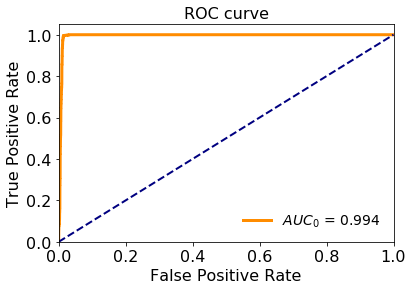

____________________________________
****** VALORE DI AUC *******
0.9940195523597101
____________________________________
****** ROC CURVE: con metodo diretto *******


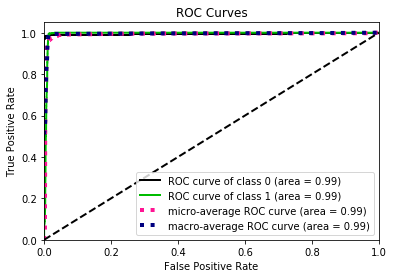

____________________________________
****** Precision recall: con metodo diretto *******


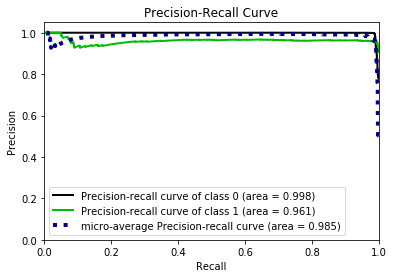

____________________________________
****** Cumulative gain: con metodo diretto *******


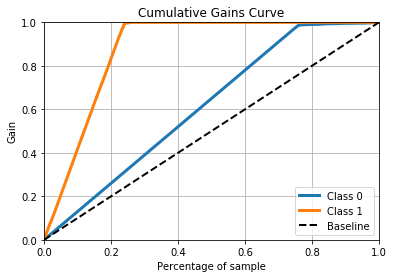

____________________________________
****** Lift curve: con metodo diretto *******


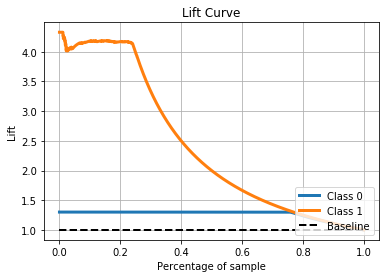

In [24]:
y_score = gauss.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

# Decision Tree

In [82]:
from sklearn import tree
from sklearn.metrics import classification_report

In [10]:
from sklearn.model_selection import GridSearchCV

# READ AND DROP COLUMNS
df.drop(df.columns[0], axis=1)
y = df['Occupancy']
X = df.drop(columns=['Occupancy'])
#X = df.drop(columns=['Occupancy', 'Temperature', 'Light','CO2', 'HumidityRatio','Day','Afternoon', 'Evening', 'Night', 'Weekday','Weekend'])

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000)

# Set the parameters by cross-validation
tuned_parameters = {
    'criterion' : ['gini', 'entropy'],
    'max_depth': [2, 5, 10, 15, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10, 20],
}

#scores = ['recall', 'f1']
scores = ['recall', 'f1', 'accuracy' , 'precision']

for score in scores:
    print("# Tuning hyper-parameters for ----> %s" % score)
    print()
    
    obj = tree.DecisionTreeClassifier()
    
    #if (score == "recall"):
    clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring=score)
    #else:
    #  clf = GridSearchCV(obj, tuned_parameters, cv=5, scoring='%s_macro' % score)
                         
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()
    print("**** Matrice di Confusione *****")
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    print(' True negative: %d False negative: %d' % (tn, fn))
    print(' True positive: %d False positive: %d' % (tp, fp))
    print("____________________________________________")

# Tuning hyper-parameters for ----> recall

Best parameters set found on development set:

{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 5}

Grid scores on development set:

0.995 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.995 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.995 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.995 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.995 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.995 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.995 (+/-0.005) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.995 (+/-0.005) for {'criterion': 'gini', 'm

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Grid scores on development set:

0.979 (+/-0.004) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.979 (+/-0.004) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.979 (+/-0.004) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.979 (+/-0.004) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.979 (+/-0.004) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.979 (+/-0.004) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.979 (+/-0.004) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.979 (+/-0.004) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'mi

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}

Grid scores on development set:

0.990 (+/-0.002) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.990 (+/-0.002) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.990 (+/-0.002) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.990 (+/-0.002) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.990 (+/-0.002) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.990 (+/-0.002) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.990 (+/-0.002) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.990 (+/-0.002) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'mi

Best parameters set found on development set:

{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}

Grid scores on development set:

0.963 (+/-0.006) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.963 (+/-0.006) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5}
0.963 (+/-0.006) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 10}
0.963 (+/-0.006) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 20}
0.963 (+/-0.006) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 2}
0.963 (+/-0.006) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 5}
0.963 (+/-0.006) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'min_samples_split': 10}
0.963 (+/-0.006) for {'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 5, 'mi

In [18]:
result_pred(y_test, y_pred)

**** Matrice di Confusione *****
 True negative: 4696 False negative: 18
 True positive: 1420 False positive: 34
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9916
Numero di campioni correttamente correlati:  6116
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9766
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.9875
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9928
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9820
____________________________________________
              precision    recall  f1-score  

## ROC curve

In [78]:
from sklearn.tree import DecisionTreeClassifier

In [79]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [80]:
#Da qui in poi ho copiato spudoratamente il codice del prof! 
#Voglio fare dei cuoricini ma fanno schifo

y_score = clf.predict_proba(X_test)
fpr0, tpr0, _ = roc_curve(y_test, y_score[:, 1])
roc_auc0 = auc(fpr0, tpr0)

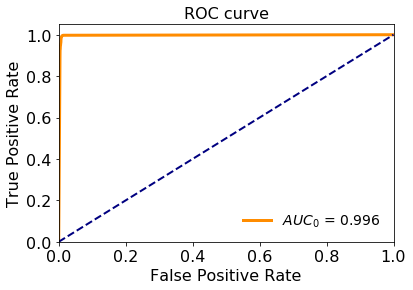

In [81]:
plt.plot(fpr0, tpr0, color='darkorange', lw=3, label='$AUC_0$ = %.3f' % (roc_auc0))

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc="lower right", fontsize=14, frameon=False)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [83]:
# READ AND DROP COLUMNS
df.drop(df.columns[0], axis=1)
y = df['Occupancy']
X = df.drop(columns=['Occupancy'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)

clf = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 10, min_samples_leaf = 1, min_samples_split = 2)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
result_pred(y_test, y_pred)

**** Matrice di Confusione *****
 True negative: 4711 False negative: 19
 True positive: 1406 False positive: 32
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9917
Numero di campioni correttamente correlati:  6117
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9777
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.9867
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9933
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9822
____________________________________________
              precision    recall  f1-score  

****** ROC CURVE + AUC?: passo passo *******


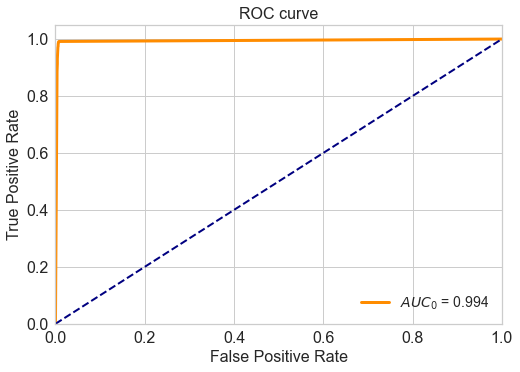

____________________________________
****** VALORE DI AUC *******
0.9936671216307689
____________________________________
****** ROC CURVE: con metodo diretto *******


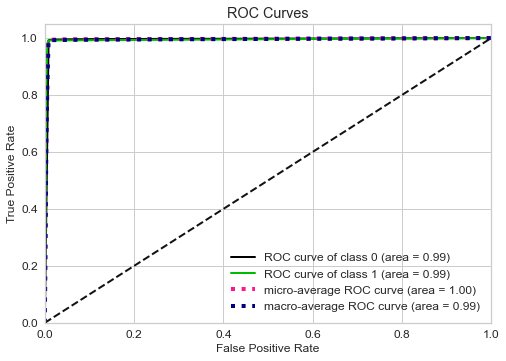

____________________________________
****** Precision recall: con metodo diretto *******


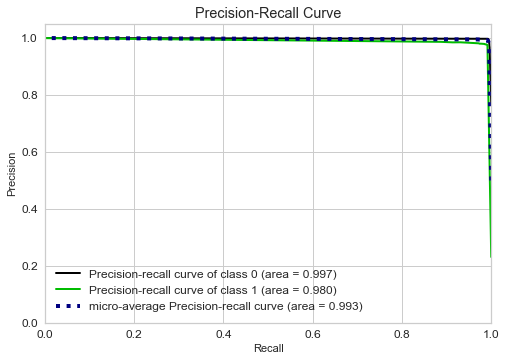

____________________________________
****** Cumulative gain: con metodo diretto *******


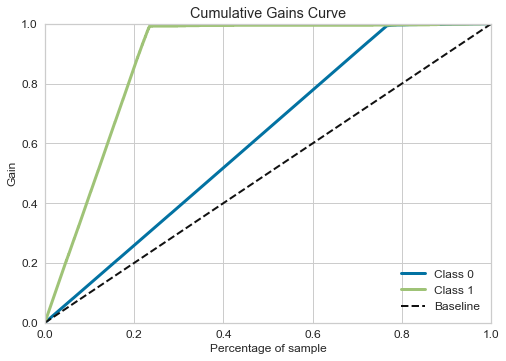

____________________________________
****** Lift curve: con metodo diretto *******


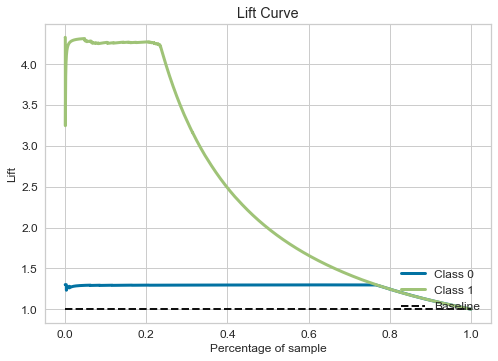

In [84]:
y_score = clf.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

# Prove Bilanciate

In [15]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import CondensedNearestNeighbour
from collections import Counter

Using TensorFlow backend.


In [16]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 4750, 1: 4750})


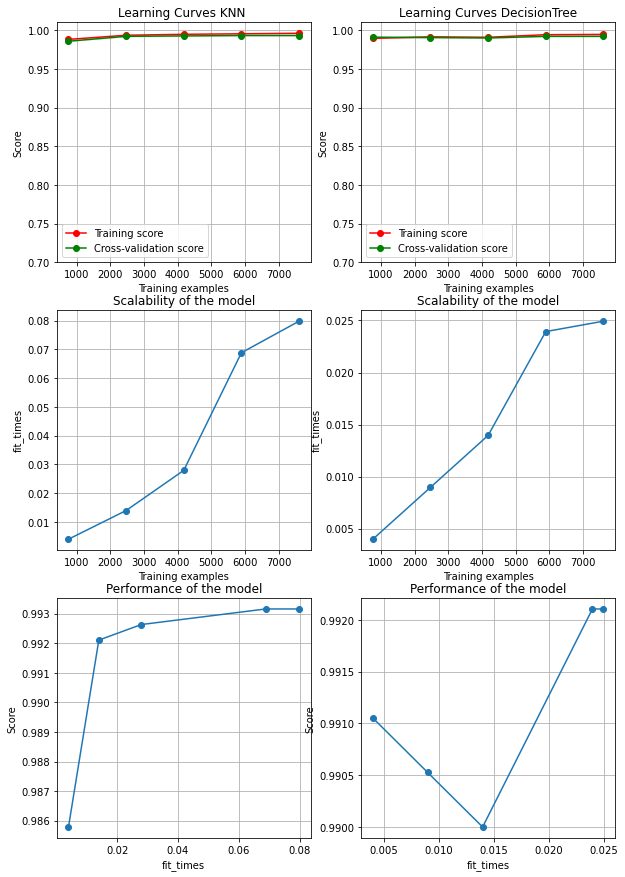

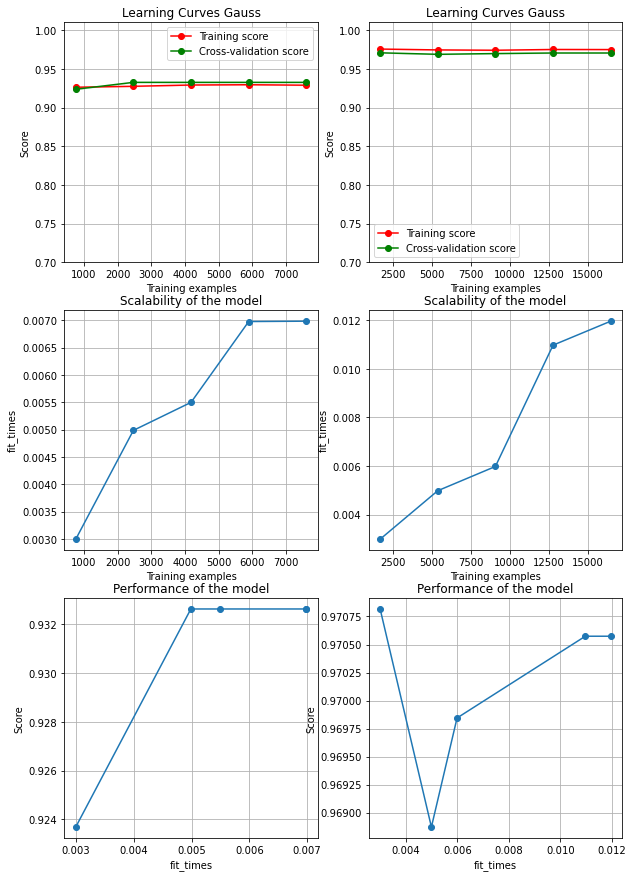

In [17]:
plot_decision_knn(X_res, y_res)
plot_gauss(X_res, y_res)

# Logistic Regression

In [9]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LinearRegression
from scipy.special import expit

In [45]:
#selected_columns = ['CO2', 'Light', 'Day', 'HumidityRatio']
#selected_columns = ['Day', 'Light', 'CO2', 'Weekday','Weekend', 'Temperature']
#selected_columns = ['Weekend', 'Light', 'CO2', 'Temperature']
selected_columns = ['Light']
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)

In [46]:
# LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, 
# intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', 
# max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)[source]

In [47]:
# penalty = 'l2', penalty = 'l1', penalty = 'l2', penalty = 'elasticnet'
logReg = LogisticRegression(random_state=0)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logReg.score(X_test, y_test)))
print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy of logistic regression classifier on test set: 0.98
Accuracy 0.9836251621271076
F1-score [0.98925189 0.96563457]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4743
           1       0.94      1.00      0.97      1425

    accuracy                           0.98      6168
   macro avg       0.97      0.99      0.98      6168
weighted avg       0.98      0.98      0.98      6168

[[4648   95]
 [   6 1419]]


In [48]:
result_pred(y_test, y_pred)

**** Matrice di Confusione *****
 True negative: 4648 False negative: 6
 True positive: 1419 False positive: 95
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9836
Numero di campioni correttamente correlati:  6067
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9373
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.9958
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9800
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9656
____________________________________________
              precision    recall  f1-score   

****** ROC CURVE + AUC?: passo passo *******


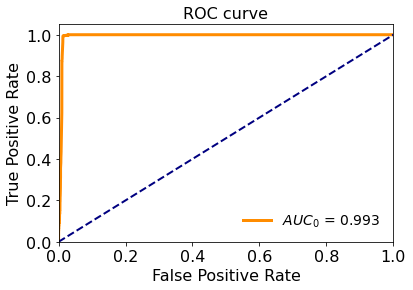

____________________________________
****** VALORE DI AUC *******
0.9925331883366438
____________________________________
****** ROC CURVE: con metodo diretto *******


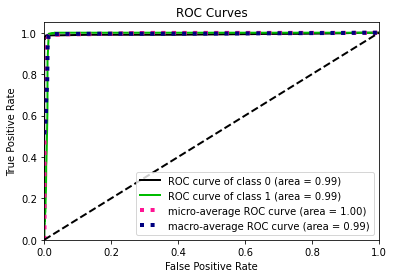

____________________________________
****** Precision recall: con metodo diretto *******


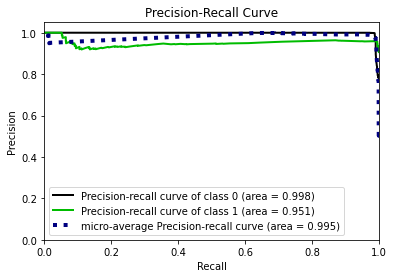

____________________________________
****** Cumulative gain: con metodo diretto *******


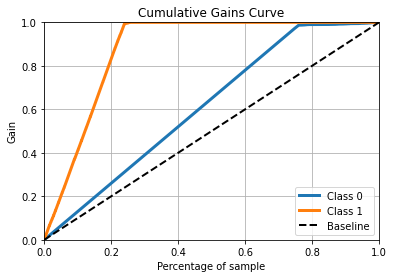

____________________________________
****** Lift curve: con metodo diretto *******


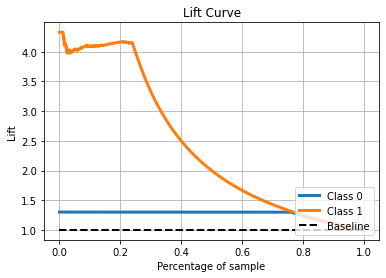

In [49]:
y_score = logReg.predict_proba(X_test)
plot_res(y_pred, y_score, y_test)

In [50]:
logReg.coef_

array([[19.08654858]])

In [51]:
logReg.intercept_

array([-6.5140183])

In [16]:
selected_columns = ['Light']
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)
logReg = LogisticRegression(random_state=0)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
result_pred(y_test, y_pred)
print(logReg.coef_)
print(logReg.intercept_)

**** Matrice di Confusione *****
 True negative: 4648 False negative: 6
 True positive: 1419 False positive: 95
____________________________________________
***** Calcolo dell'accuracy *****
Frazione di campioni correttamente correlati: 0.9836
Numero di campioni correttamente correlati:  6067
____________________________________________
**** Calcolo della precisione *****
Percentuale di classificazioni positive che sono corrette: 0.9373
____________________________________________
**** Calcolo della recall (sensitivity) *****
Percentuale di elementi positivi del testing set che sono stati classificati come positivi: 0.9958
____________________________________________
**** Calcolo della specificity *****
Percentuale di elementi negativi del testing set che sono stati classificati come negativi: 0.9800
____________________________________________
**** Calcolo della F1 score *****
F1 scores: 0.9656
____________________________________________
              precision    recall  f1-score   

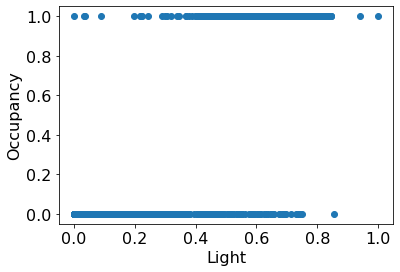

In [17]:
loss = expit(sorted(X_test) * logReg.coef_ + logReg.intercept_).ravel()
#plt.plt(sorted(X_test), loss, color='red', linewidth=3)
plt.scatter(X_train, y_train)
plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

In [18]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

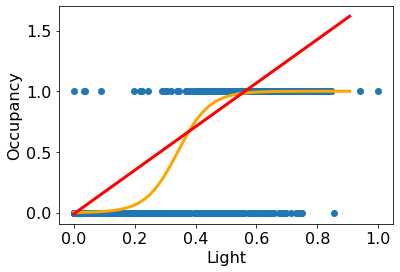

In [19]:
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * logReg.coef_ + logReg.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=3)


plt.xlabel(selected_columns[0], fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
c:\users\matte\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:193: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


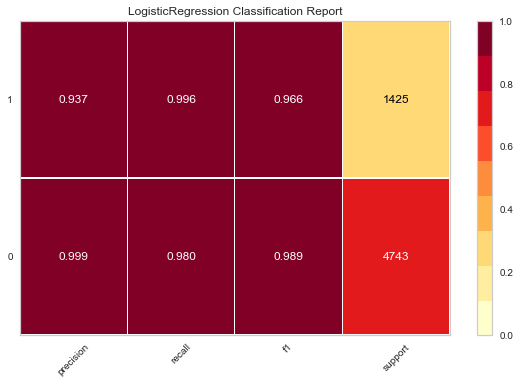

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

selected_columns = ['Light']
attributes = [col for col in df.columns if col != class_name]
X = df[selected_columns].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1000, stratify=y)



from yellowbrick.datasets import load_occupancy
from yellowbrick.classifier import classification_report


# Specify the target classes
classes = ["0", "1"]

# Instantiate the visualizer
visualizer = classification_report(
    LogisticRegression(), X_train, y_train, X_test, y_test, classes=classes, support=True
)

# Logistic Regression Bilanciata

In [66]:
attributes = [col for col in df.columns if col != class_name]
X = df[["Light"]].values
y = df[class_name]

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=1000, stratify=y_res)

logReg = LogisticRegression(random_state=0)
logReg.fit(X_train, y_train)
y_pred = logReg.predict(X_test)
result_pred(y_test, y_pred)
print(logReg.coef_)
print(logReg.intercept_)
reg = LinearRegression()
reg.fit(X_train, y_train)
plt.scatter(X_train, y_train)

loss = expit(sorted(X_test) * logReg.coef_ + logReg.intercept_).ravel()
plt.plot(sorted(X_test), loss, color='orange', linewidth=3)

plt.plot(sorted(X_test), reg.coef_ * sorted(X_test) + reg.intercept_, color='red', linewidth=3)


plt.xlabel("Light", fontsize=16)
plt.ylabel('Occupancy', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.show()

NameError: name 'RandomUnderSampler' is not defined